In [5]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(32cm, 10cm)

main_dir = "/home/german/labo/16/ANA/examples/"

"/home/german/labo/16/ANA/examples/"

# 1hvr_apo

In [9]:
hvr_apo_dir = "1hvr_apo/"

# Epock
epock_hvr_apo_vol = readdlm(string(main_dir, hvr_apo_dir, "epock/volume.dat_trr"), header = true)[1];

# ANA
loprec_ana_hvr_apo_vol = readdlm(string(main_dir, hvr_apo_dir, "ana/volumen_loprec"));
hiprec_ana_hvr_apo_vol = readdlm(string(main_dir, hvr_apo_dir, "ana/volumen_hiprec"));

In [16]:
cor(loprec_ana_hvr_apo_vol[:, 2], epock_hvr_apo_vol[:, 2])

0.6421955540874766

In [10]:
cor(hiprec_ana_hvr_apo_vol[:, 2], epock_hvr_apo_vol[:, 2])

0.7165740599155606

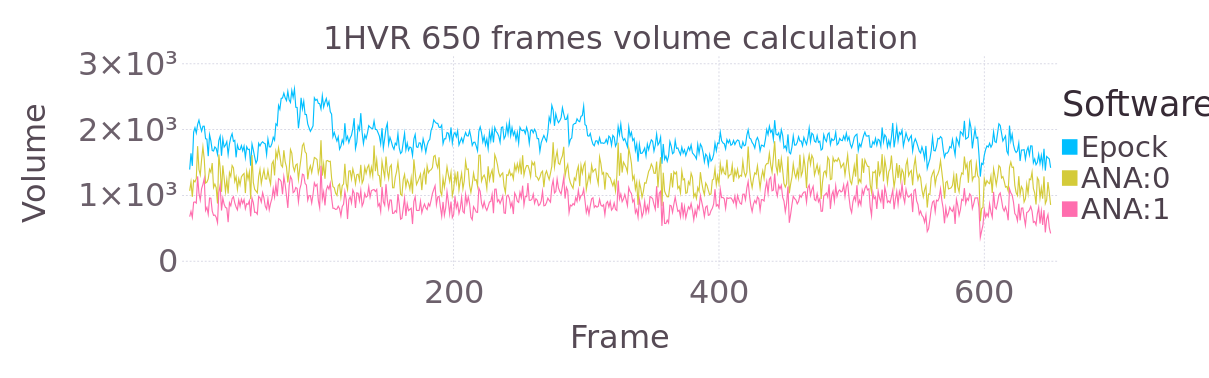

In [19]:
hvr_apo_vol = DataFrame(Volume = [ epock_hvr_apo_vol[:, 2];
    loprec_ana_hvr_apo_vol[:, 2]; hiprec_ana_hvr_apo_vol[:, 2] ],
    Frame = [ collect(1:650); collect(1:650); collect(1:650) ],
    Software = repeat(["Epock"; "ANA:0"; "ANA:1"], inner=[length(hiprec_ana_hvr_apo_vol[:, 1])]));


phvr_apo_vol = plot(hvr_apo_vol, Geom.line, x = "Frame", y = "Volume", color="Software",
    
    Guide.title("1HVR 650 frames volume calculation"),
    Guide.xlabel("Frame"),
    Coord.cartesian(xmax = 650),

    Theme(minor_label_font_size = 24pt, major_label_font_size = 24pt,
        key_title_font_size=26pt, key_label_font_size=22pt))